In [193]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.optimize import minimize
%matplotlib inline


Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))


In [194]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])



a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).


b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [195]:
def cosinus(a, b):
    aLength = np.linalg.norm(a)
    bLength = np.linalg.norm(b)
    return np.dot( a, b ) / ( aLength * bLength )

In [196]:
ttt = []
res=[]

In [197]:
for i, user in enumerate(raitings):
    for j, user_2 in enumerate(raitings):
#         print(i, j, cosinus(user, user_2))
#         ttt.append([i, [j, cosinus(user, user_2)]])
#         ttt.append([i, {j:cosinus(user, user_2)}])
        res.append(cosinus(user, user_2).round(3))
    


In [198]:
cos = np.array(res).reshape(10,10)
# cos

In [199]:
cos[cos>0.95]=0

In [200]:
cos

array([[0.   , 0.826, 0.849, 0.783, 0.819, 0.741, 0.727, 0.81 , 0.911,
        0.86 ],
       [0.826, 0.   , 0.812, 0.846, 0.871, 0.827, 0.826, 0.8  , 0.825,
        0.82 ],
       [0.849, 0.812, 0.   , 0.847, 0.784, 0.791, 0.676, 0.763, 0.821,
        0.919],
       [0.783, 0.846, 0.847, 0.   , 0.692, 0.787, 0.833, 0.829, 0.777,
        0.859],
       [0.819, 0.871, 0.784, 0.692, 0.   , 0.776, 0.782, 0.812, 0.879,
        0.846],
       [0.741, 0.827, 0.791, 0.787, 0.776, 0.   , 0.74 , 0.845, 0.806,
        0.855],
       [0.727, 0.826, 0.676, 0.833, 0.782, 0.74 , 0.   , 0.827, 0.811,
        0.792],
       [0.81 , 0.8  , 0.763, 0.829, 0.812, 0.845, 0.827, 0.   , 0.798,
        0.837],
       [0.911, 0.825, 0.821, 0.777, 0.879, 0.806, 0.811, 0.798, 0.   ,
        0.901],
       [0.86 , 0.82 , 0.919, 0.859, 0.846, 0.855, 0.792, 0.837, 0.901,
        0.   ]])

In [201]:
for k, usr in enumerate(cos):
    print(k, list(cos[k]).index(cos[k].max()))

0 8
1 4
2 9
3 9
4 8
5 9
6 3
7 5
8 0
9 2


In [226]:
# pd.DataFrame(cos)

In [229]:
# pd.DataFrame(cos.T).max()

In [46]:
# для уменьшения количества признаков до 5 я бы использовал метод PCA.
# На данный момент это наиболее отработанный мной метод из ранее пройденных.


Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).


In [47]:
from scipy.misc import derivative

In [52]:
def f(x):
    return (np.tan((np.sin(x)) + (np.cos(2*x+3))))**2

In [53]:
derivative(f, 1.0, dx=1e-6)

55.3859176464222

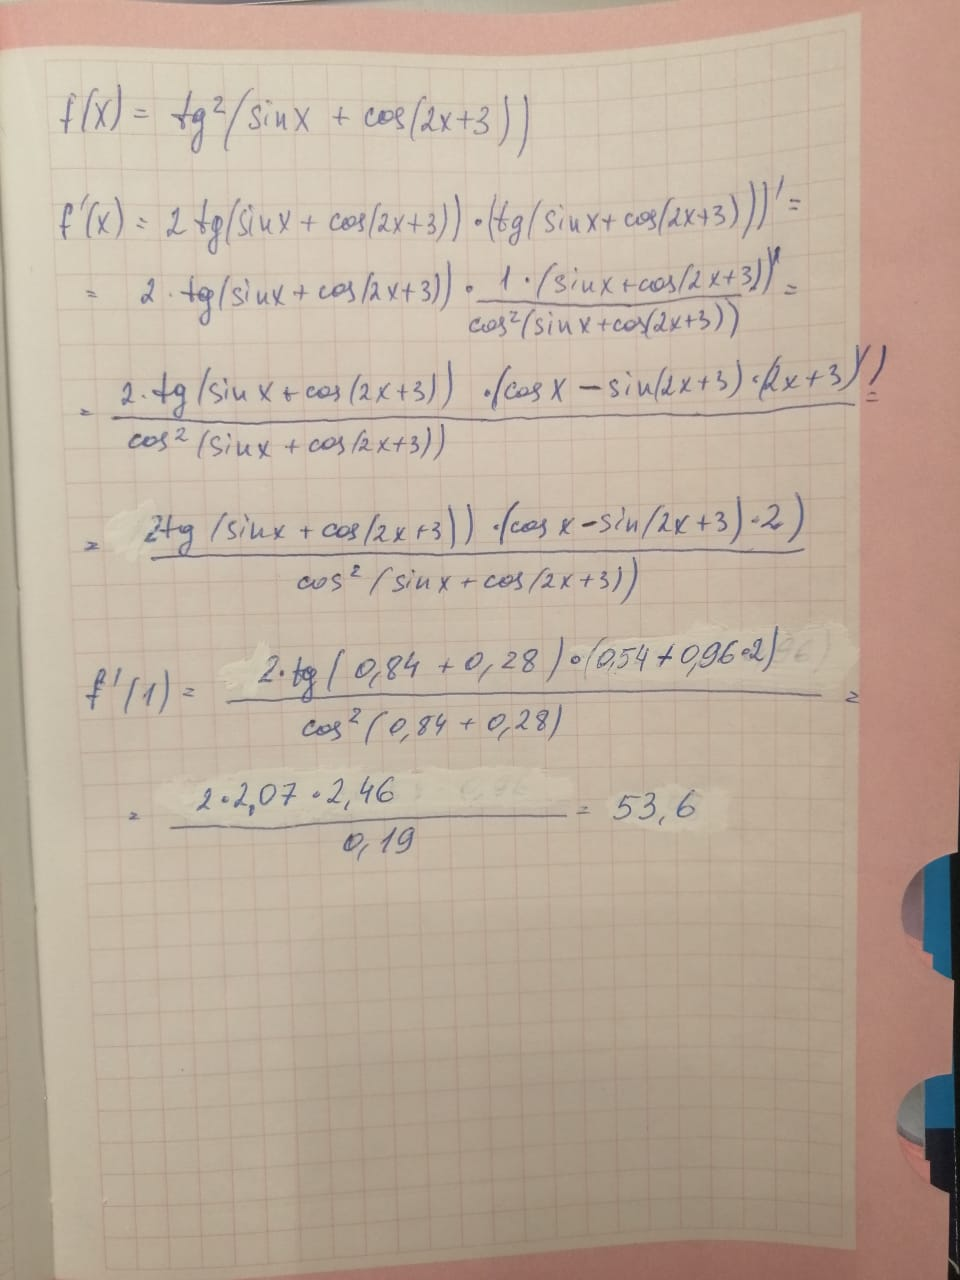

In [54]:
from IPython.display import Image
Image("img2.jpeg")


Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error


In [37]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [38]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [39]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

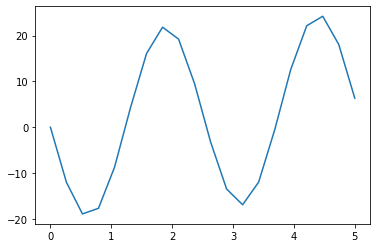

In [40]:
plt.plot(x, fx)
plt.show()

In [49]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [45]:
# def error(params):
#     return np.sum(np.abs(fx - f(x, a, b)))

In [46]:
from scipy.optimize import minimize

In [62]:
params = np.array([1,1])

In [63]:
res = minimize(error, params, method='nelder-mead', options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 228.356720
         Iterations: 109
         Function evaluations: 207


In [64]:
res

 final_simplex: (array([[1.95282585, 1.56625208],
       [1.95282586, 1.56625208],
       [1.95282586, 1.56625208]]), array([228.3567197, 228.3567197, 228.3567197]))
           fun: 228.35671969694644
       message: 'Optimization terminated successfully.'
          nfev: 207
           nit: 109
        status: 0
       success: True
             x: array([1.95282585, 1.56625208])


Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.


In [23]:
from numpy.random import choice

In [29]:
# np.random.random(20)

In [24]:
values = choice(np.random.random(20), size=(1000, 50))

In [28]:
# values

In [26]:
data = pd.DataFrame(values)
data

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.764016,0.952118,0.671123,0.568194,0.556401,0.828382,0.224603,0.671123,0.404223,0.468846,...,0.300736,0.404223,0.671123,0.828382,0.650246,0.764016,0.471818,0.241521,0.404223,0.888724
1,0.468846,0.556401,0.556401,0.440676,0.241521,0.650246,0.952118,0.671123,0.404223,0.471818,...,0.471818,0.241521,0.241521,0.952118,0.440676,0.828382,0.468846,0.404223,0.468846,0.568194
2,0.556401,0.300736,0.241521,0.828382,0.381444,0.763820,0.764016,0.828382,0.404223,0.000032,...,0.471818,0.381444,0.404223,0.764016,0.471818,0.952118,0.440676,0.224603,0.241521,0.224603
3,0.952118,0.241521,0.404223,0.763820,0.650246,0.468846,0.381444,0.734833,0.671123,0.828382,...,0.471818,0.828382,0.404223,0.241521,0.440676,0.471818,0.952118,0.300736,0.888724,0.952118
4,0.224603,0.763820,0.888724,0.471818,0.471818,0.556401,0.711986,0.381444,0.711986,0.468846,...,0.763820,0.671123,0.711986,0.556401,0.241521,0.828382,0.440676,0.404223,0.952118,0.471818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.888724,0.471818,0.671123,0.734833,0.952118,0.828382,0.671123,0.888724,0.888724,0.381444,...,0.224603,0.404223,0.764016,0.000032,0.671123,0.650246,0.381444,0.471818,0.828382,0.888724
996,0.952118,0.568194,0.381444,0.468846,0.952118,0.471818,0.568194,0.711986,0.468846,0.568194,...,0.763820,0.224603,0.671123,0.241521,0.763820,0.952118,0.568194,0.828382,0.440676,0.568194
997,0.471818,0.300736,0.381444,0.381444,0.556401,0.764016,0.671123,0.381444,0.241521,0.764016,...,0.888724,0.224603,0.471818,0.381444,0.556401,0.671123,0.763820,0.952118,0.000032,0.763820
998,0.888724,0.763820,0.650246,0.241521,0.468846,0.241521,0.440676,0.763820,0.440676,0.763820,...,0.224603,0.828382,0.763820,0.241521,0.000032,0.381444,0.224603,0.471818,0.568194,0.300736


In [32]:
data.mean()

0     0.545357
1     0.559360
2     0.562265
3     0.553125
4     0.573136
5     0.548500
6     0.562817
7     0.543866
8     0.554002
9     0.545714
10    0.556876
11    0.549434
12    0.549046
13    0.559021
14    0.550536
15    0.553202
16    0.542977
17    0.531331
18    0.552776
19    0.563207
20    0.539327
21    0.557888
22    0.554465
23    0.544691
24    0.556025
25    0.546263
26    0.535778
27    0.552437
28    0.535477
29    0.544724
30    0.548164
31    0.543155
32    0.561042
33    0.534102
34    0.560937
35    0.539614
36    0.544977
37    0.553892
38    0.553312
39    0.556440
40    0.546466
41    0.551739
42    0.547930
43    0.546841
44    0.552001
45    0.551778
46    0.555520
47    0.568120
48    0.553922
49    0.541637
dtype: float64

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

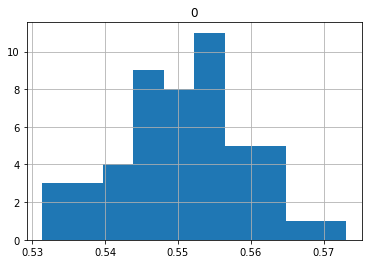

In [45]:
pd.DataFrame(data.mean()).hist()


Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, 4],

[1, 1]]


In [9]:
m = np.array([[1, 4],
[1, 1]])
print(m)

[[1 4]
 [1 1]]


In [10]:
w, v = np.linalg.eig(m)

In [11]:
w, v

(array([ 3., -1.]),
 array([[ 0.89442719, -0.89442719],
        [ 0.4472136 ,  0.4472136 ]]))

In [12]:
for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[:,i]))

Собственное значение 3.0000000000000004
соответствующий ему собственный вектор [0.89442719 0.4472136 ]
Собственное значение -0.9999999999999996
соответствующий ему собственный вектор [-0.89442719  0.4472136 ]


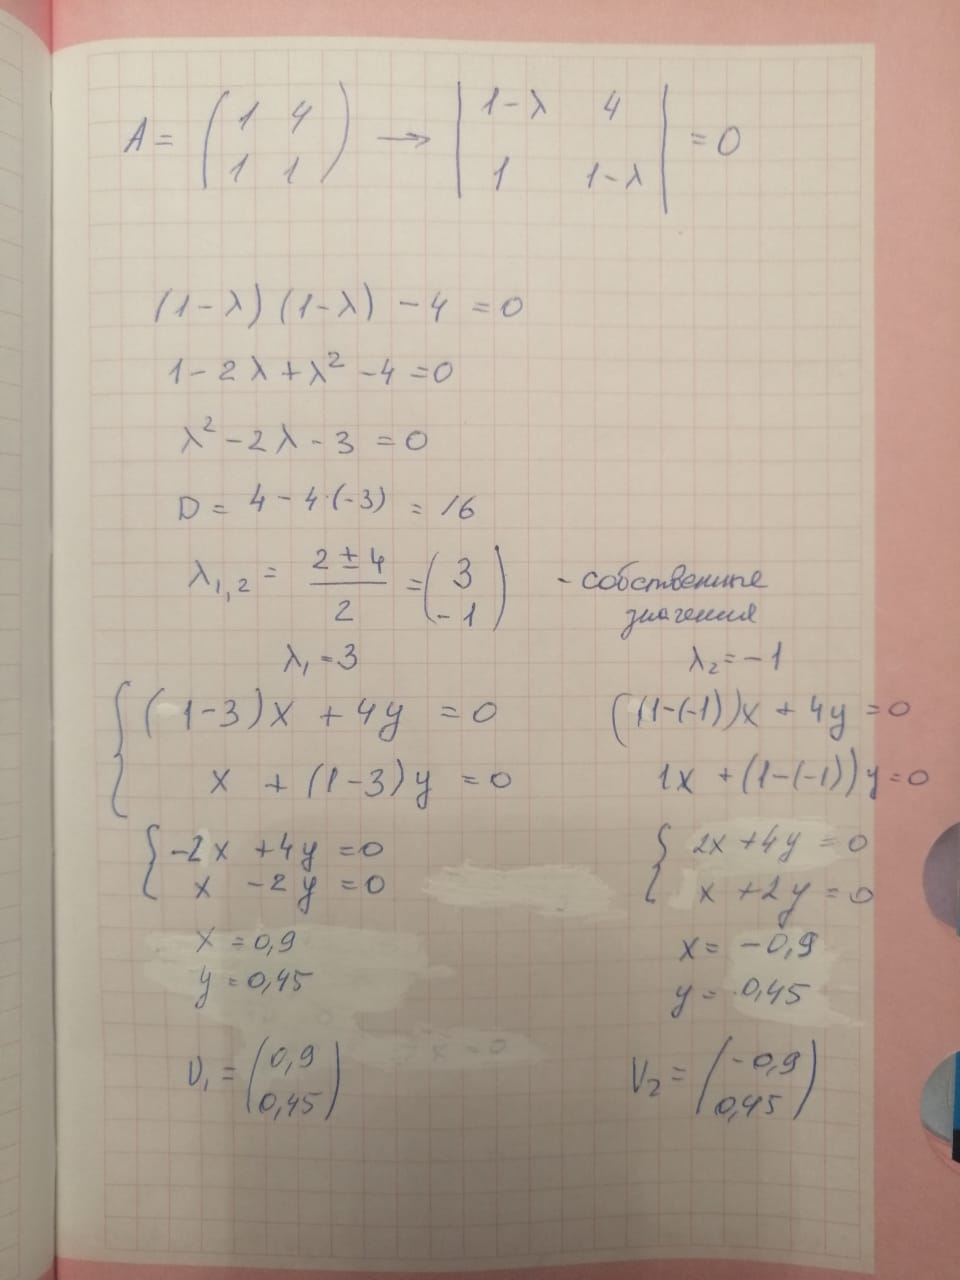

In [55]:
Image("img.jpeg")